# Math Students Analysis

## Introduction
The dataset contains informations about math students and their final grades. In this notebook, I will try to do data analysis and data exploration on the dataset to gain insights about the dataset.

The dataset is taken from https://www.kaggle.com/datasets/janiobachmann/math-students.

## Objectives
- Explore the dataset and get familiar with the data.
- Clean the dataset (find and handling anomalies and missing data).
- Data visualisations (univariate, bivariate, multivariate analysis).
- Determine significant variables.
- Conclusions.

## Importing and Glancing at The Data
- Import necessary library. 
- Import dataset. 
- Find data shape and glancing at the data. 

In [73]:
# Importing libraries
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind 
from scipy.stats import mannwhitneyu 
from scipy.stats import kruskal 
from scipy.stats import normaltest 
from statsmodels.stats import weightstats as stests

In [2]:
# Import the data

df = pd.read_csv("./student-mat.csv")

In [3]:
df.shape

(395, 33)

Looking at the data and understand a little bit of it.

In [4]:
with pd.option_context('display.max_row', 5, 'display.max_columns', None):
    display(df.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


A lot of categorical data.

## Cleaning Data
- Find and manage missing values. 
- Find and manage duplicated observations. 
- Find and manage irrelevant values. 
- Reformat datatypes if needed. 
- Reformat strings if needed. 


In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df.duplicated().any()

False

No missing data and no duplicated observations. 

In [7]:
for column in df.columns: 
    print(f"{column}: [{df[column].unique()}]")

school: [['GP' 'MS']]
sex: [['F' 'M']]
age: [[18 17 15 16 19 22 20 21]]
address: [['U' 'R']]
famsize: [['GT3' 'LE3']]
Pstatus: [['A' 'T']]
Medu: [[4 1 3 2 0]]
Fedu: [[4 1 2 3 0]]
Mjob: [['at_home' 'health' 'other' 'services' 'teacher']]
Fjob: [['teacher' 'other' 'services' 'health' 'at_home']]
reason: [['course' 'other' 'home' 'reputation']]
guardian: [['mother' 'father' 'other']]
traveltime: [[2 1 3 4]]
studytime: [[2 3 1 4]]
failures: [[0 3 2 1]]
schoolsup: [['yes' 'no']]
famsup: [['no' 'yes']]
paid: [['no' 'yes']]
activities: [['no' 'yes']]
nursery: [['yes' 'no']]
higher: [['yes' 'no']]
internet: [['no' 'yes']]
romantic: [['no' 'yes']]
famrel: [[4 5 3 1 2]]
freetime: [[3 2 4 1 5]]
goout: [[4 3 2 1 5]]
Dalc: [[1 2 5 3 4]]
Walc: [[1 3 2 4 5]]
health: [[3 5 1 2 4]]
absences: [[ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]]
G1: [[ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]]
G2: [[ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 

No irrelevant data. 

## Univariate Analysis
- Show distribution of all variables. 
- Find and manage outliers. 


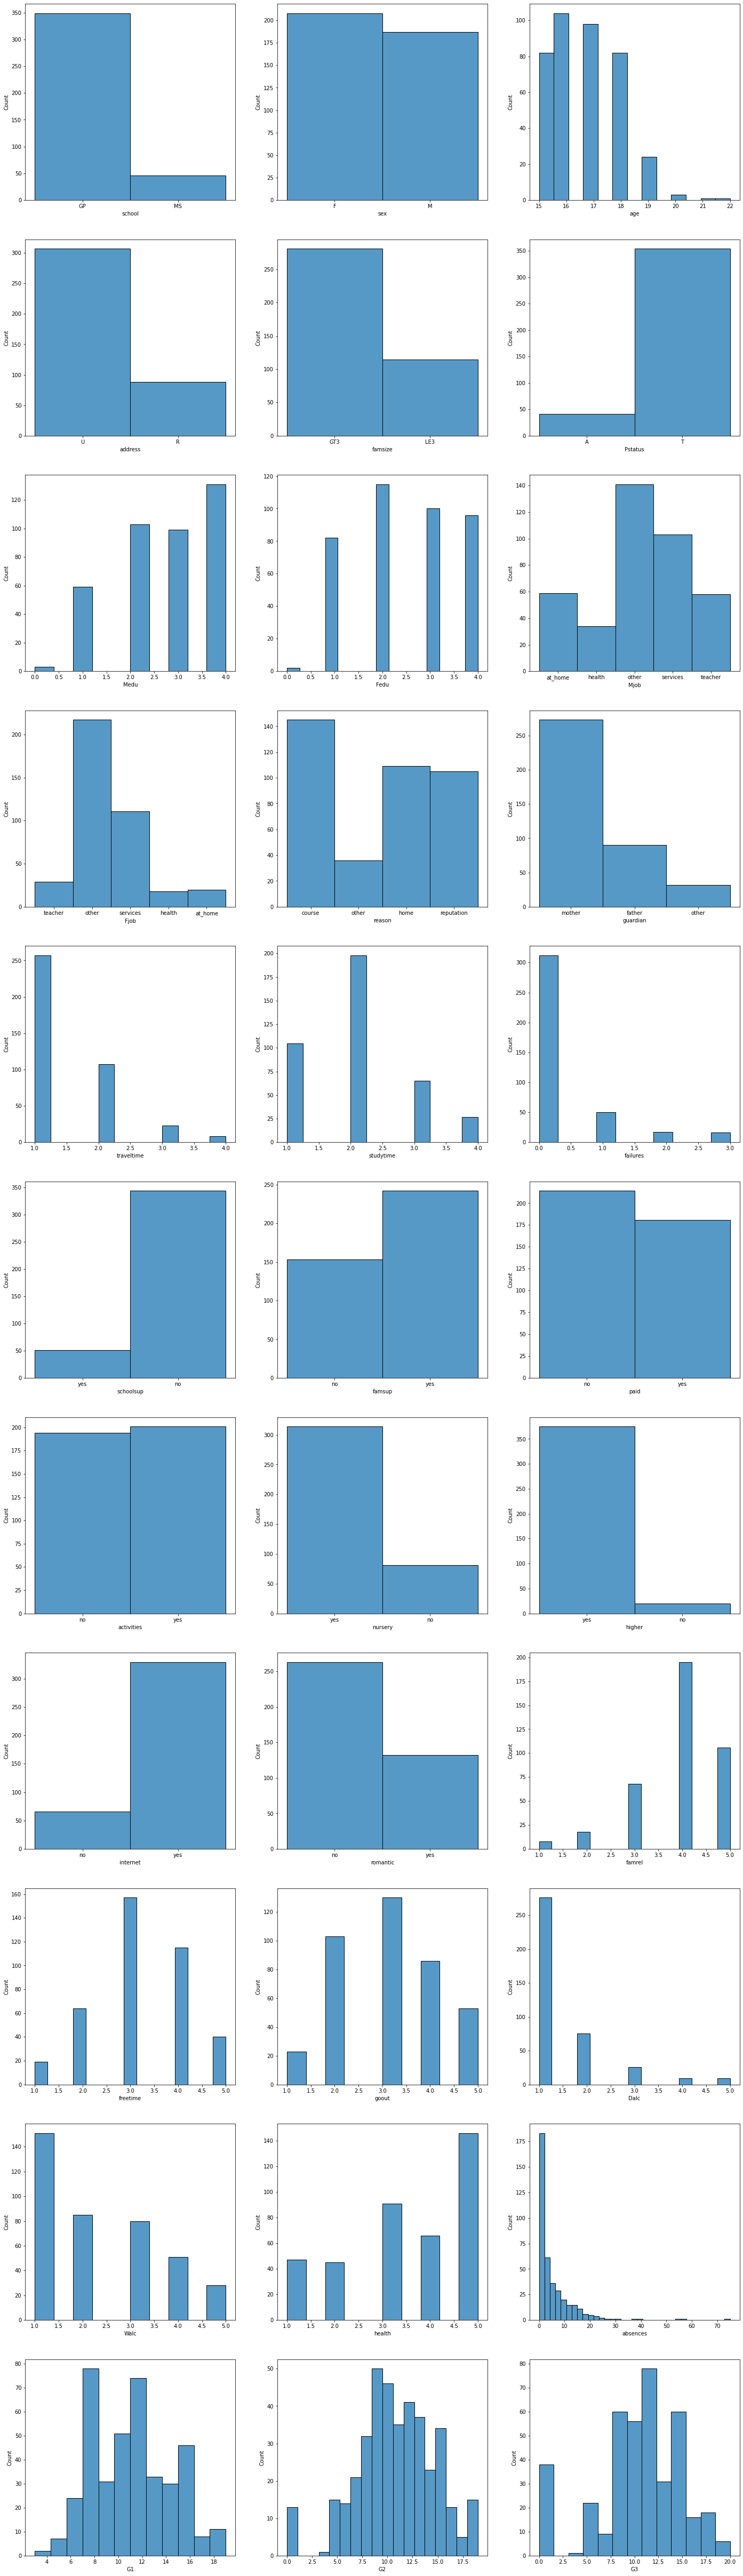

In [8]:
columns_number = len(df.columns)
row_number = math.ceil(columns_number/3)
fig, ax = plt.subplots(row_number, 3, figsize=(24, 8*row_number))
count = 0
sns.reset_defaults()
for i in range(row_number): 
    for j in range(3):
        if count < len(df.columns):
            sns.histplot(ax=ax[i, j], data=df[df.columns[count]])
            count += 1

In [9]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Some things that I find interesting: 
- There are more students in GP school than MS school. Might want to check reasons why there are more students in GP school. 
- Male and female students are quite similar in count. Which of male and female students score better? 
- There are a few students in rural area. Might want to check traveltime. 
- A few students don't live with their parent/family. Might want to check family support and school support. 
- Most parents are educated with mothers mostly have higher education. On contrast, fathers mostly in 5th to 9th grade. Might want to check parents education on scores.  
- Most students don't have extra educational support. 
- Most students have educational support from family, but there is not much different than those who don't. 
- Does extra paid class has something to do with scores? 
- Students with and without extra-curricular activities are pretty even. Let's check the score. 

Some things that I wnat to check: 
- Check students who want higher education with scores. 
- Check students who has internet access and those who don't with scores. Check internet with study time. 
- Check romantic with study time and scores and sex. 
- Check free time with study time. 
- Check free time with scores. 
- Check study time with scores. 

## Exploratory Data Analysis (EDA)
Explore things found in points above. 

### 1. More students in GP school than MS school. 

<AxesSubplot:xlabel='school', ylabel='Count'>

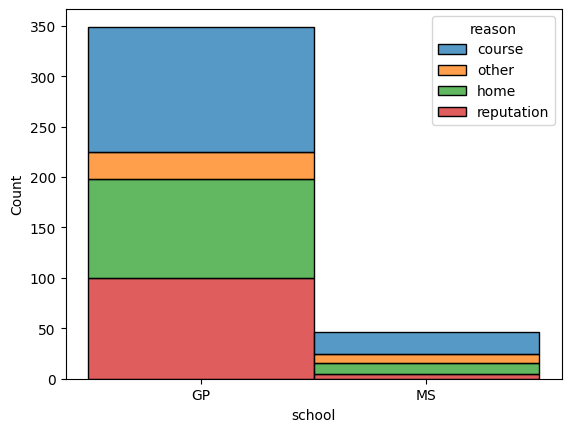

In [10]:
sns.histplot(x=df.school, hue=df.reason, multiple="stack")

In [11]:
school_reason = df.groupby(['school', 'reason']).size()

In [12]:
school_reason

school  reason    
GP      course        124
        home           98
        other          27
        reputation    100
MS      course         21
        home           11
        other           9
        reputation      5
dtype: int64

In [13]:
for school, reason in school_reason.index: 
    sum = school_reason[school, reason]
    school_sum = school_reason[school].sum() 
    print(f"{sum} students {round(100*sum/school_sum, 2)}% applied to {school} school because of {reason}")

124 students 35.53% applied to GP school because of course
98 students 28.08% applied to GP school because of home
27 students 7.74% applied to GP school because of other
100 students 28.65% applied to GP school because of reputation
21 students 45.65% applied to MS school because of course
11 students 23.91% applied to MS school because of home
9 students 19.57% applied to MS school because of other
5 students 10.87% applied to MS school because of reputation


Looking at the numbers above, we can see that almost half of MS school students prefer their school because of the course. While GP school students' reasons are pretty even between course, home, and reputation, with most chossing because of course. 
Let's use $\Chi^2$ test to see whether there is a specific reason for students of each school to choose their school. 

Null Hypothesis: there is no significant difference in whether students in either school are more likely to apply because of course, home, reputation, or other. 

In [14]:
ct_table = school_reason.unstack() 
chi2_stat, p, dof, expected = chi2_contingency(ct_table)

print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")

chi2 statistic:     12.465
p-value:            0.0059478
degrees of freedom: 3


For $alpha=0.05$, the p-value is far below the alpha, hence the null hypothesis can be rejected. Which means, there is a significant between students' reason in choosing their school. 

### 2. Male vs female scores 

<AxesSubplot:xlabel='sex', ylabel='G3'>

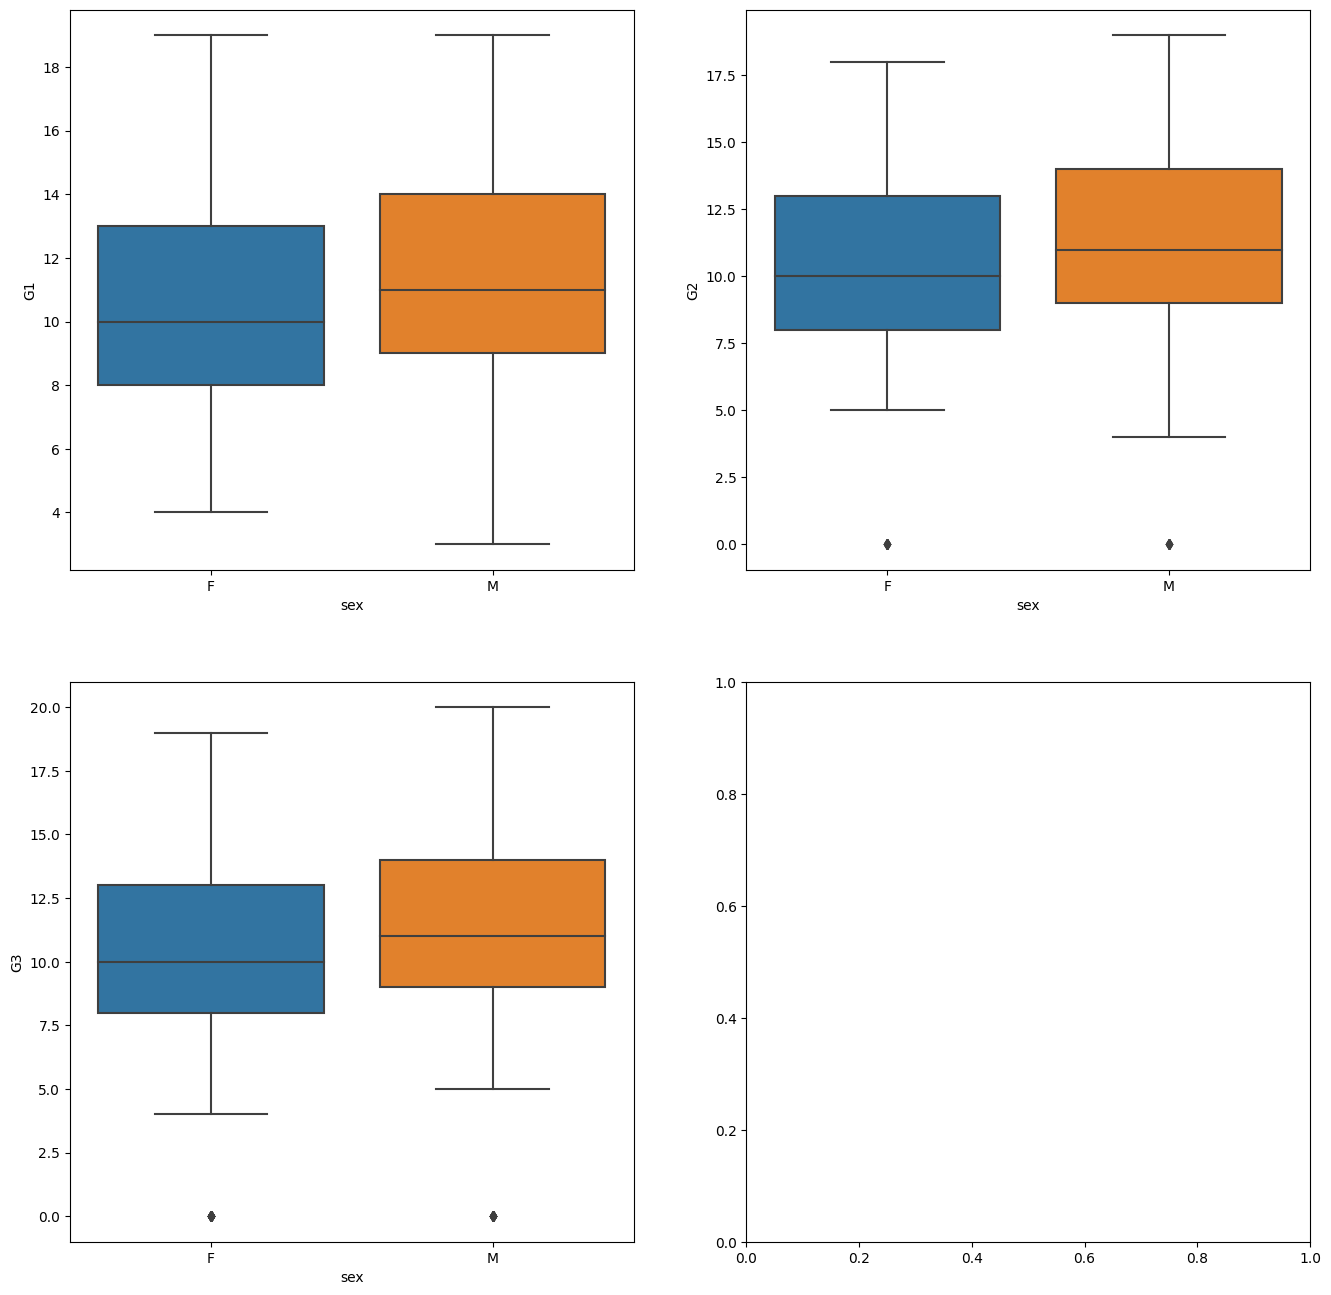

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16)) 
sns.boxplot(ax=ax[0, 0], x=df['sex'], y=df['G1'])
sns.boxplot(ax=ax[0, 1], x=df['sex'], y=df['G2'])
sns.boxplot(ax=ax[1, 0], x=df['sex'], y=df['G3']) 

- Male students score higher than male students. 

### 3. Students' address with travel time and their schools. 

<AxesSubplot:xlabel='address', ylabel='traveltime'>

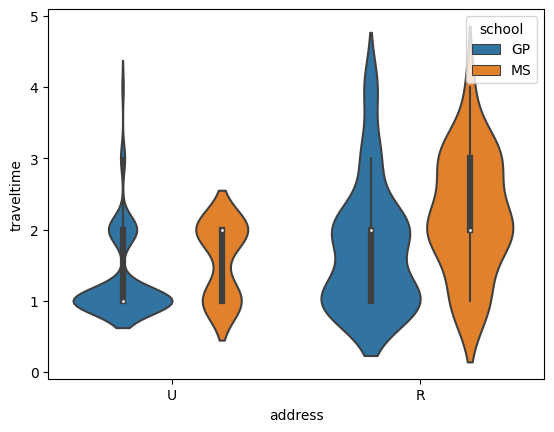

In [16]:
sns.violinplot(x=df['address'], y=df['traveltime'], hue=df['school'])

It seems students who live in urban area are much closer to both schools, although there are a few who lives quite far from GP school. Students who live in rural area are much closer to GP school rather than MS school. 

### 4. Students living alone or not with family and school supports. 

In [17]:
pstatus_famsup = df.groupby(['Pstatus', 'famsup']).size()

In [18]:
pstatus_famsup

Pstatus  famsup
A        no         17
         yes        24
T        no        136
         yes       218
dtype: int64

In [19]:
for pstatus, famsup in pstatus_famsup.index: 
    sum = pstatus_famsup[pstatus, famsup] 
    pstatus_sum = pstatus_famsup[pstatus].sum() 
    if famsup=='yes': 
        if pstatus=='A': 
            print(f"{sum} students {round(100*sum/pstatus_sum, 2)}% living alone has family support. ")
        else: 
            print(f"{sum} students {round(100*sum/pstatus_sum, 2)}% living together has family support. ")
    else: 
        if pstatus=='T': 
            print(f"{sum} students {round(100*sum/pstatus_sum, 2)}% living alone has no family support. ")
        else: 
            print(f"{sum} students {round(100*sum/pstatus_sum, 2)}% living alone has no family support. ")

17 students 41.46% living alone has no family support. 
24 students 58.54% living alone has family support. 
136 students 38.42% living alone has no family support. 
218 students 61.58% living together has family support. 


<AxesSubplot:xlabel='Pstatus', ylabel='Count'>

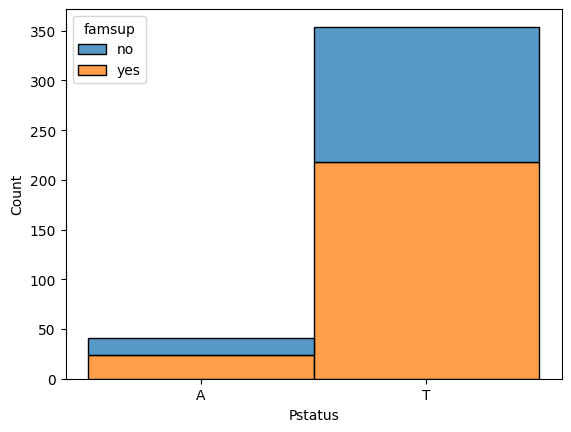

In [20]:
sns.histplot(x=df['Pstatus'], hue=df['famsup'], multiple='stack')

In [21]:
chi2_stat, p, dof, expected = chi2_contingency(pstatus_famsup.unstack())

print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")


chi2 statistic:     0.04394
p-value:            0.83397
degrees of freedom: 1


In [22]:
pstatus_schoolsup = df.groupby(['Pstatus', 'schoolsup']).size()

In [23]:
pstatus_schoolsup

Pstatus  schoolsup
A        no            34
         yes            7
T        no           310
         yes           44
dtype: int64

In [24]:
for pstatus, schoolsup in pstatus_schoolsup.index: 
    sum = pstatus_schoolsup[pstatus, schoolsup] 
    pstatus_sum = pstatus_schoolsup[pstatus].sum() 
    if schoolsup=='yes': 
        if pstatus=='A': 
            print(f"{sum} students {round(100*sum/pstatus_sum, 2)}% living alone has school support. ")
        else: 
            print(f"{sum} students {round(100*sum/pstatus_sum, 2)}% living together has school support. ")
    else: 
        if pstatus=='T': 
            print(f"{sum} students {round(100*sum/pstatus_sum, 2)}% living alone has no school support. ")
        else: 
            print(f"{sum} students {round(100*sum/pstatus_sum, 2)}% living alone has no school support. ")

34 students 82.93% living alone has no school support. 
7 students 17.07% living alone has school support. 
310 students 87.57% living alone has no school support. 
44 students 12.43% living together has school support. 


<AxesSubplot:xlabel='Pstatus', ylabel='Count'>

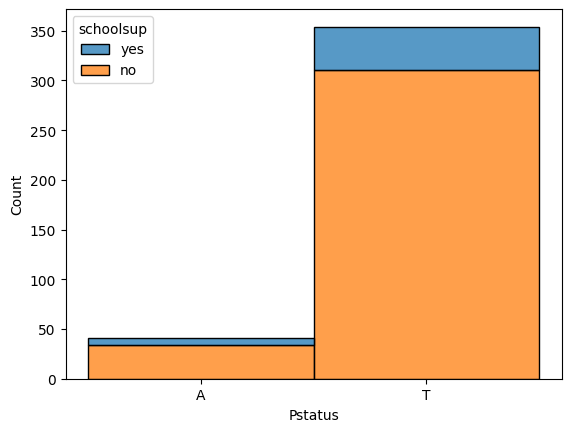

In [25]:
sns.histplot(x=df['Pstatus'], hue=df['schoolsup'], multiple='stack')

In [26]:
pstatus_famsup = df.groupby(['Pstatus', 'schoolsup']).size().unstack() 
chi2_stat, p, dof, expected = chi2_contingency(pstatus_famsup)

print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")

chi2 statistic:     0.35221
p-value:            0.55286
degrees of freedom: 1


- Both tests show that there is no significant relationship between students living alone or together with parents and having family support or school support or not. 
- Both schools doesn't give much educational support for their supports. 

### 5. Parents education with scores. 

In [27]:
medu_scores = df[['Medu', 'G1', 'G2', 'G3']]

In [28]:
medu_scores

,Medu,G1,G2,G3
0,4,5,6,6
1,1,5,5,6
2,1,7,8,10
3,4,15,14,15
4,3,6,10,10
...,...,...,...,...
390,2,9,9,9
391,3,14,16,16
392,1,10,8,7
393,3,11,12,10


<AxesSubplot:xlabel='Medu', ylabel='G3'>

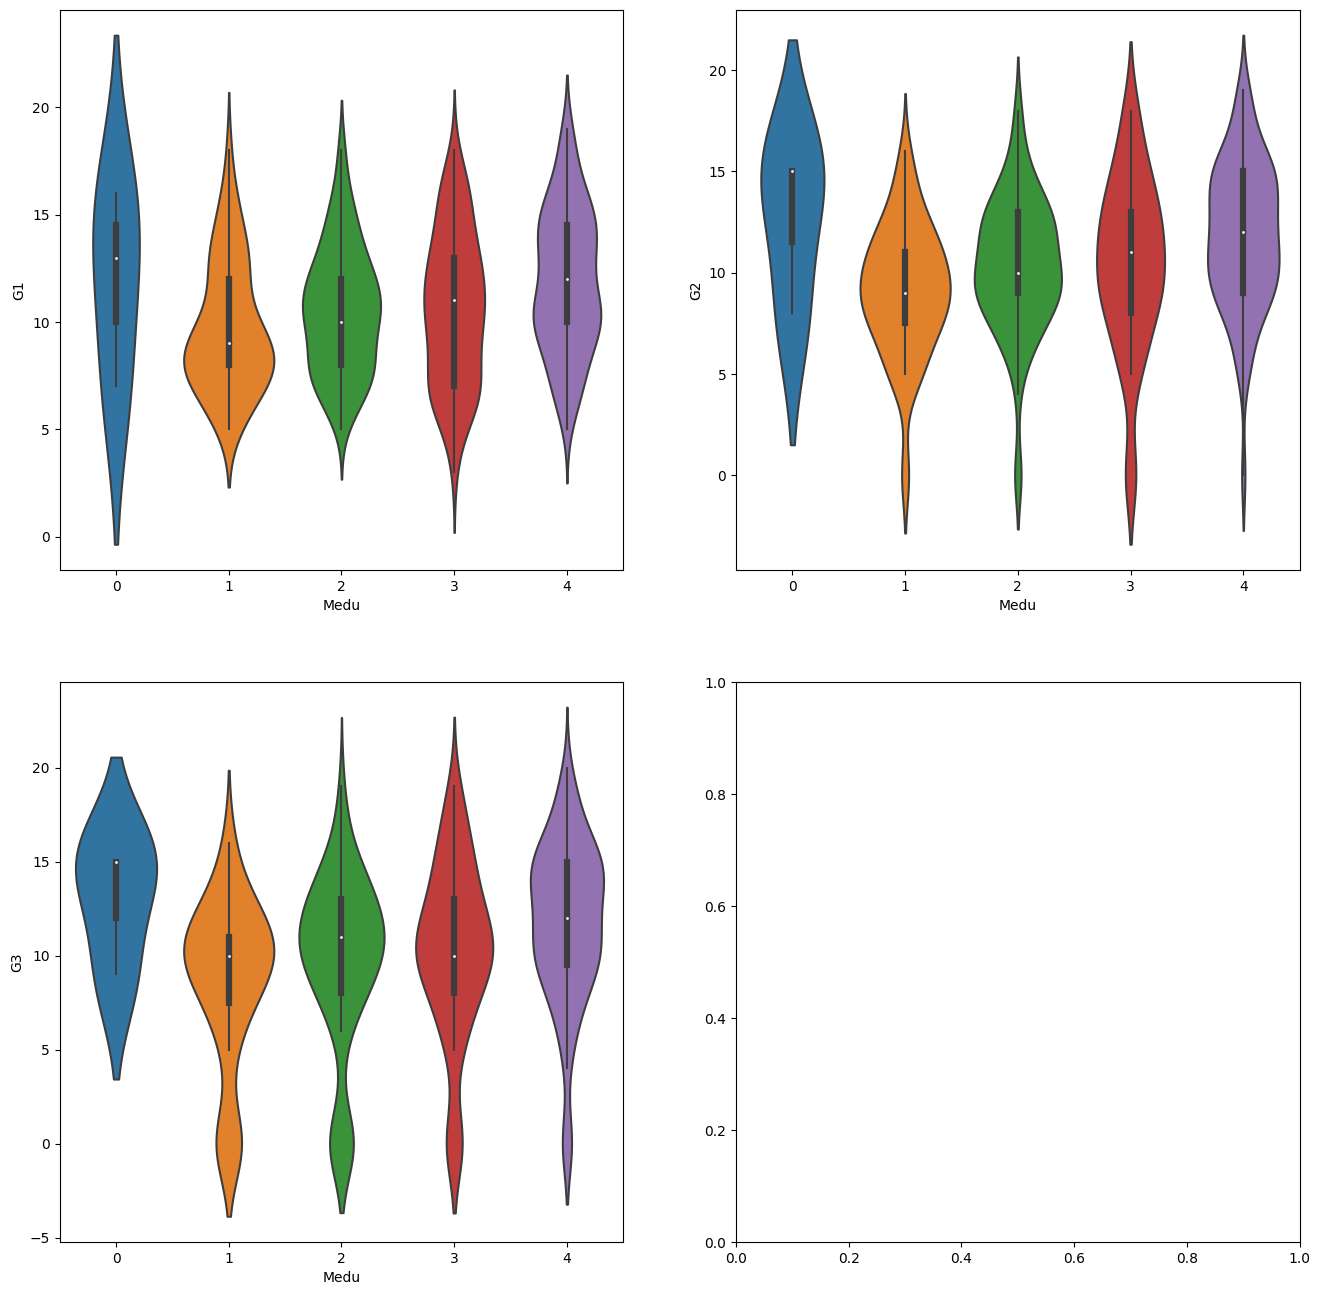

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))
sns.violinplot(ax=ax[0,0], x=medu_scores['Medu'], y=medu_scores['G1'])
sns.violinplot(ax=ax[0,1], x=medu_scores['Medu'], y=medu_scores['G2'])
sns.violinplot(ax=ax[1,0], x=medu_scores['Medu'], y=medu_scores['G3'])

- Students whose mother has level 0 education, although a few, scores pretty good between 10 and 15. Some even score higher than other level of education. 
- Students whose mother has level 1 education, score lower than the rest. 
- Students score are increasing from level 1-4 education, with level 4 being the highest overall. 

In [30]:
fedu_scores = df[['Fedu', 'G1', 'G2', 'G3']]

In [31]:
fedu_scores

,Fedu,G1,G2,G3
0,4,5,6,6
1,1,5,5,6
2,1,7,8,10
3,2,15,14,15
4,3,6,10,10
...,...,...,...,...
390,2,9,9,9
391,1,14,16,16
392,1,10,8,7
393,2,11,12,10


<AxesSubplot:xlabel='Fedu', ylabel='G3'>

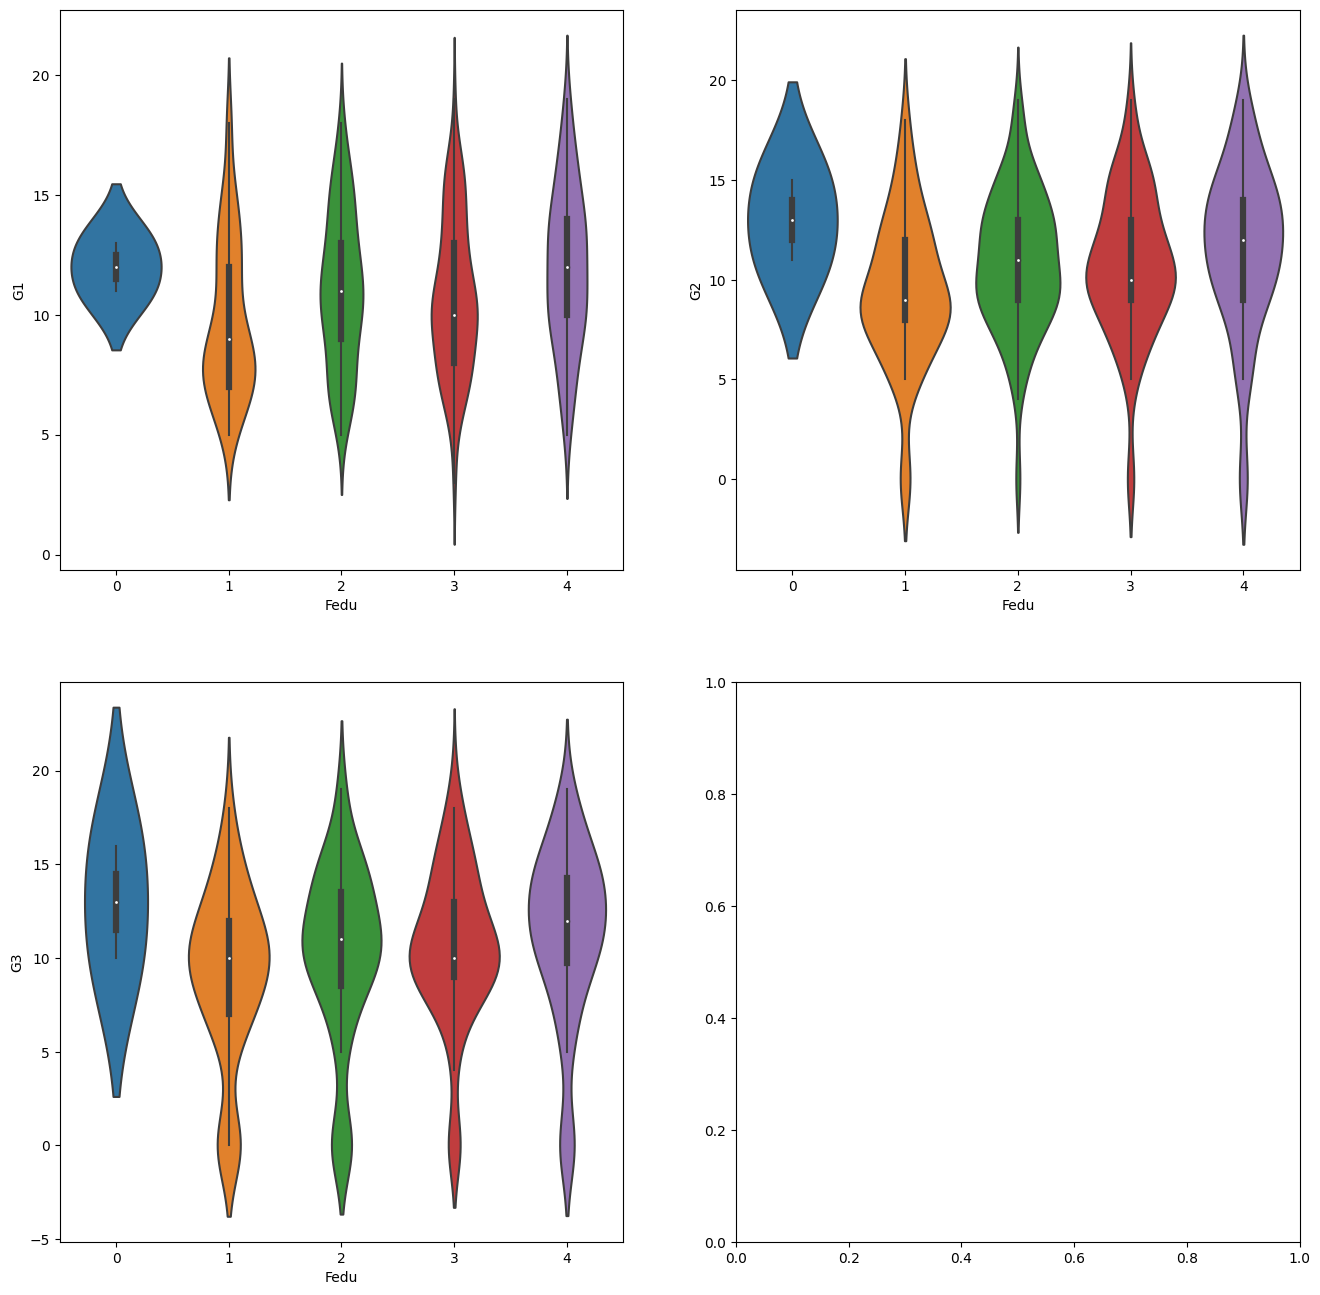

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))
sns.violinplot(ax=ax[0,0], x=fedu_scores['Fedu'], y=fedu_scores['G1'])
sns.violinplot(ax=ax[0,1], x=fedu_scores['Fedu'], y=fedu_scores['G2'])
sns.violinplot(ax=ax[1,0], x=fedu_scores['Fedu'], y=fedu_scores['G3'])

- Looking at father's education, it's quite similar with mother's education. 
- Students whose father with level 0 education, score quite similar to level 4 education. 
- Students whose father with level 2 and 3 education has similar scores. 

### 6. Extra paid class with scores. 

In [33]:
extra_scores = df[['paid', 'G1', 'G2', 'G3']] 

In [34]:
extra_scores 

,paid,G1,G2,G3
0,no,5,6,6
1,no,5,5,6
2,yes,7,8,10
3,yes,15,14,15
4,yes,6,10,10
...,...,...,...,...
390,yes,9,9,9
391,no,14,16,16
392,no,10,8,7
393,no,11,12,10


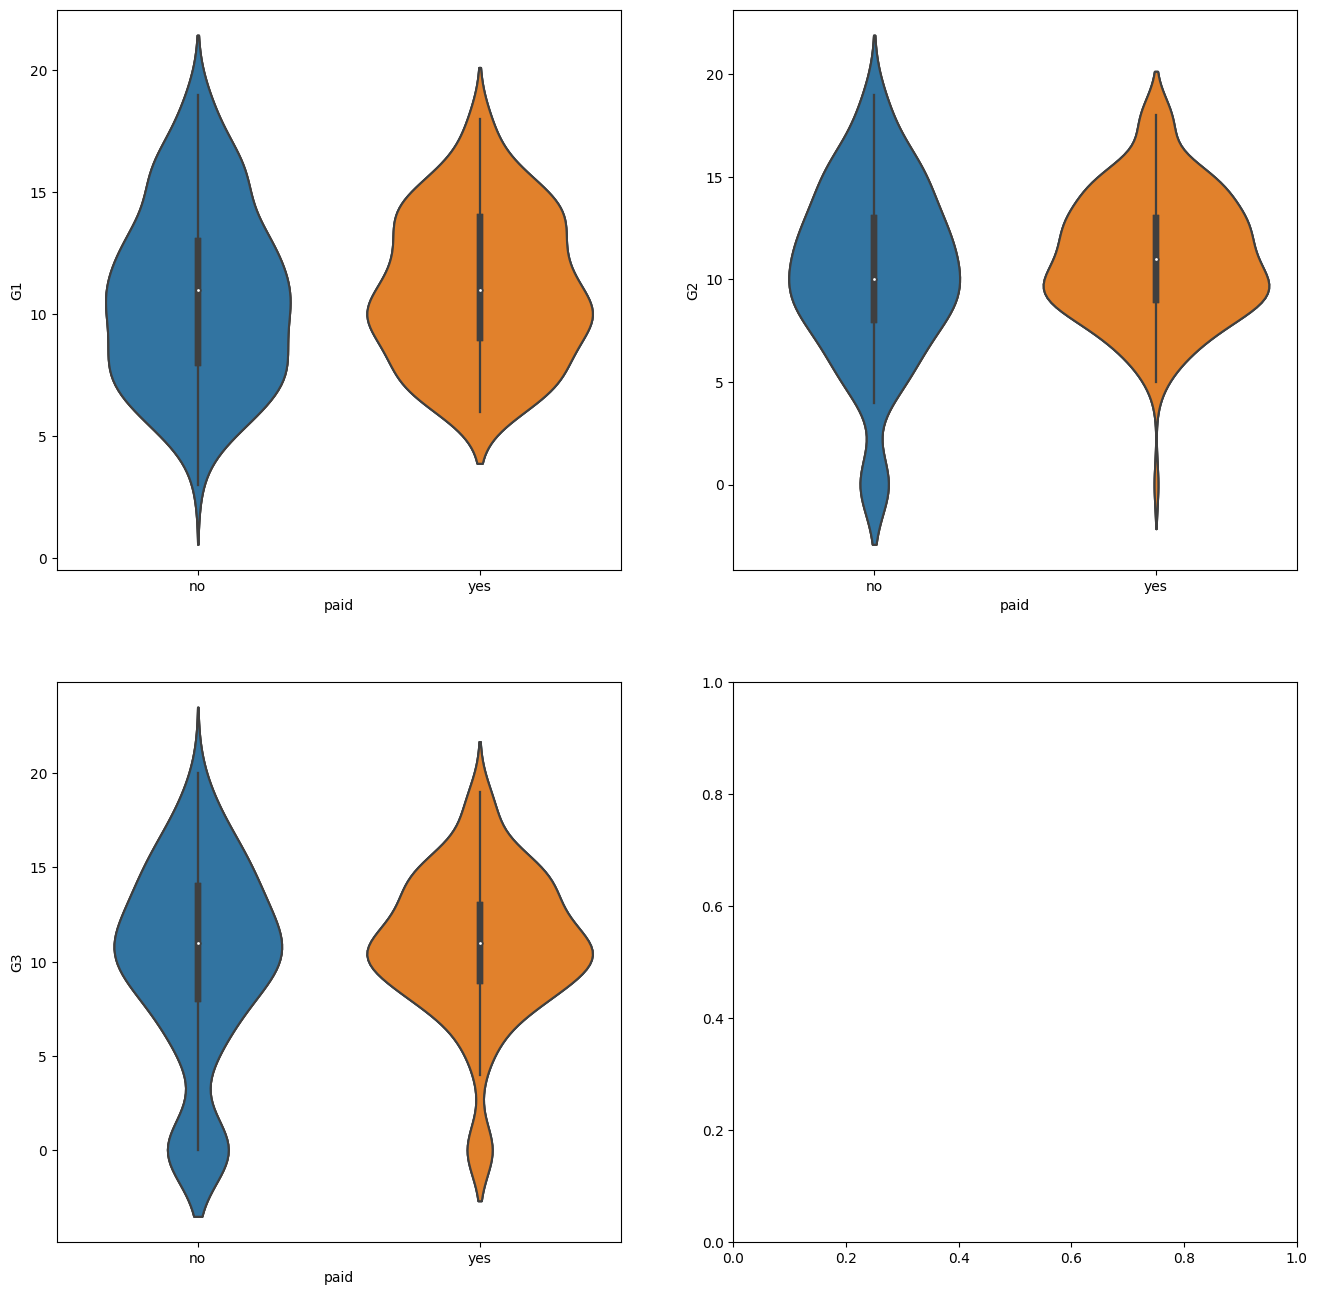

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16)) 
sns.violinplot(ax=ax[0,0], x=extra_scores['paid'], y=extra_scores['G1'])
sns.violinplot(ax=ax[0,1], x=extra_scores['paid'], y=extra_scores['G2'])
sns.violinplot(ax=ax[1,0], x=extra_scores['paid'], y=extra_scores['G3'])

In [36]:
G1_paid = extra_scores[extra_scores['paid']=='yes']['G1']
G1_not_paid = extra_scores[extra_scores['paid']=='no']['G1']
G2_paid = extra_scores[extra_scores['paid']=='yes']['G2']
G2_not_paid = extra_scores[extra_scores['paid']=='no']['G2']
G3_paid = extra_scores[extra_scores['paid']=='yes']['G3']
G3_not_paid = extra_scores[extra_scores['paid']=='no']['G3']

In [37]:
k2, p = normaltest(G1_paid) 
print(p)

0.0005405872883399636


In [38]:
k2, p = normaltest(G1_not_paid) 
print(p)

0.0012611194779791677


In [39]:
k2, p = normaltest(G2_paid) 
print(p)

0.6864588690307181


In [40]:
k2, p = normaltest(G2_not_paid) 
print(p)

0.029404172620192716


In [41]:
k2, p = normaltest(G3_paid) 
print(p)

3.555235437697553e-05


In [42]:
k2, p = normaltest(G3_not_paid) 
print(p)

0.0016706249928698917


All normality tests give only paid extra class on G2 score. Therefore, use Mann-Whitney U Test whether paying for extra class has effect on scores. 

In [43]:
stat, pval = mannwhitneyu(G1_paid, G1_not_paid)
print(pval)

0.3431548414941743


In [44]:
stat, pval = mannwhitneyu(G2_paid, G2_not_paid)
print(pval)

0.11506675525051839


In [45]:
stat, pval = mannwhitneyu(G3_paid, G3_not_paid)
print(pval)

0.2267174723224844


- There is no significant difference in G1 scores between paying for extra class or not. 
- There is no significant difference in G2 scores between paying for extra class or not. 
- There is no significant difference in G3 scores between paying for extra class or not. 
- Paying for extra class doesn't change your score significantly. 

### 7. Extra-curricular activities with scores. 

In [46]:
act_scores = df[['activities', 'G1', 'G2', 'G3']] 

In [47]:
act_scores 

,activities,G1,G2,G3
0,no,5,6,6
1,no,5,5,6
2,no,7,8,10
3,yes,15,14,15
4,no,6,10,10
...,...,...,...,...
390,no,9,9,9
391,no,14,16,16
392,no,10,8,7
393,no,11,12,10


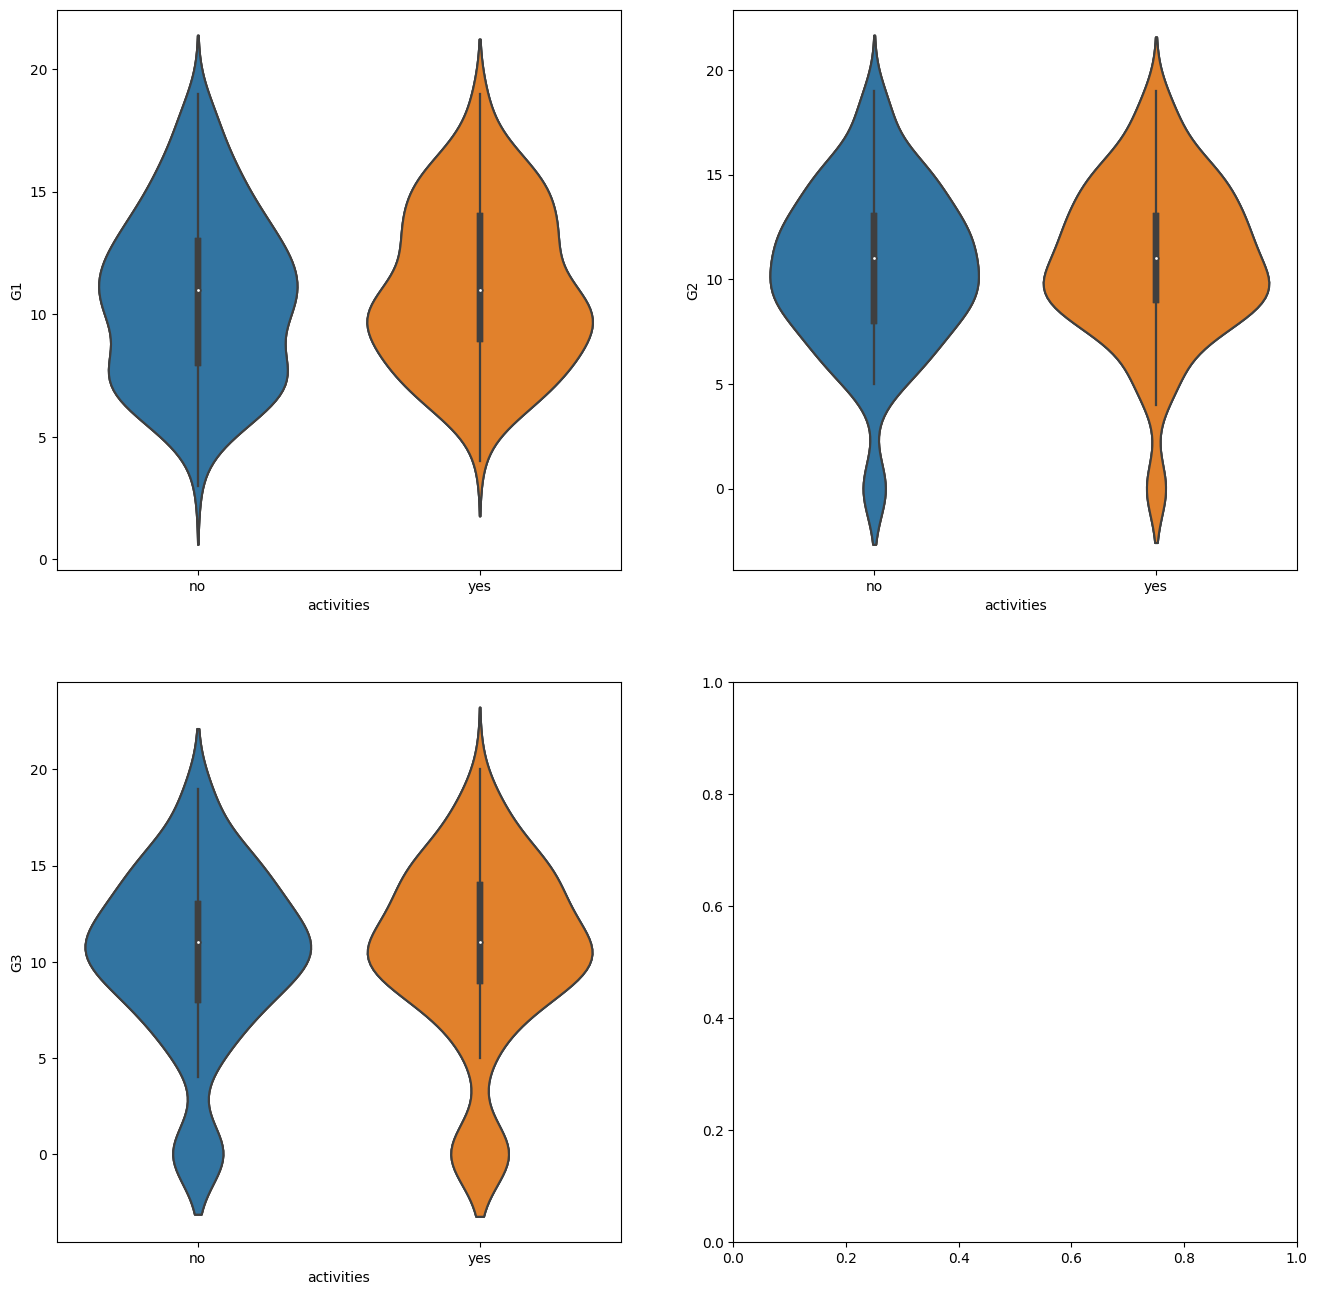

In [48]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16)) 
sns.violinplot(ax=ax[0,0], x=act_scores['activities'], y=act_scores['G1'])
sns.violinplot(ax=ax[0,1], x=act_scores['activities'], y=act_scores['G2'])
sns.violinplot(ax=ax[1,0], x=act_scores['activities'], y=act_scores['G3'])

In [49]:
act_G1 = act_scores[act_scores['activities']=='yes']['G1']
no_act_G1 = act_scores[act_scores['activities']=='no']['G1']
act_G2 = act_scores[act_scores['activities']=='yes']['G2']
no_act_G2 = act_scores[act_scores['activities']=='no']['G2']
act_G3 = act_scores[act_scores['activities']=='yes']['G3']
no_act_G3 = act_scores[act_scores['activities']=='no']['G3']

In [50]:
stat, pval = mannwhitneyu(act_G1, no_act_G1)
print(pval)

0.26383696140187707


In [51]:
stat, pval = mannwhitneyu(act_G2, no_act_G2)
print(pval)

0.3140456866657638


In [52]:
stat, pval = mannwhitneyu(act_G3, no_act_G3)
print(pval)

0.6048582746261837


- There is no significant difference in G1 scores between having extra-curricular activities or not. 
- There is no significant difference in G2 scores between having extra-curricular activities or not. 
- There is no significant difference in G3 scores between having extra-curricular activities or not. 
- Students' extra-curricular activities don't affect their scores. 

### 8. Students' scores who want higher education. 

In [53]:
high_scores = df[['higher', 'G1', 'G2', 'G3']] 

In [54]:
high_scores 

,higher,G1,G2,G3
0,yes,5,6,6
1,yes,5,5,6
2,yes,7,8,10
3,yes,15,14,15
4,yes,6,10,10
...,...,...,...,...
390,yes,9,9,9
391,yes,14,16,16
392,yes,10,8,7
393,yes,11,12,10


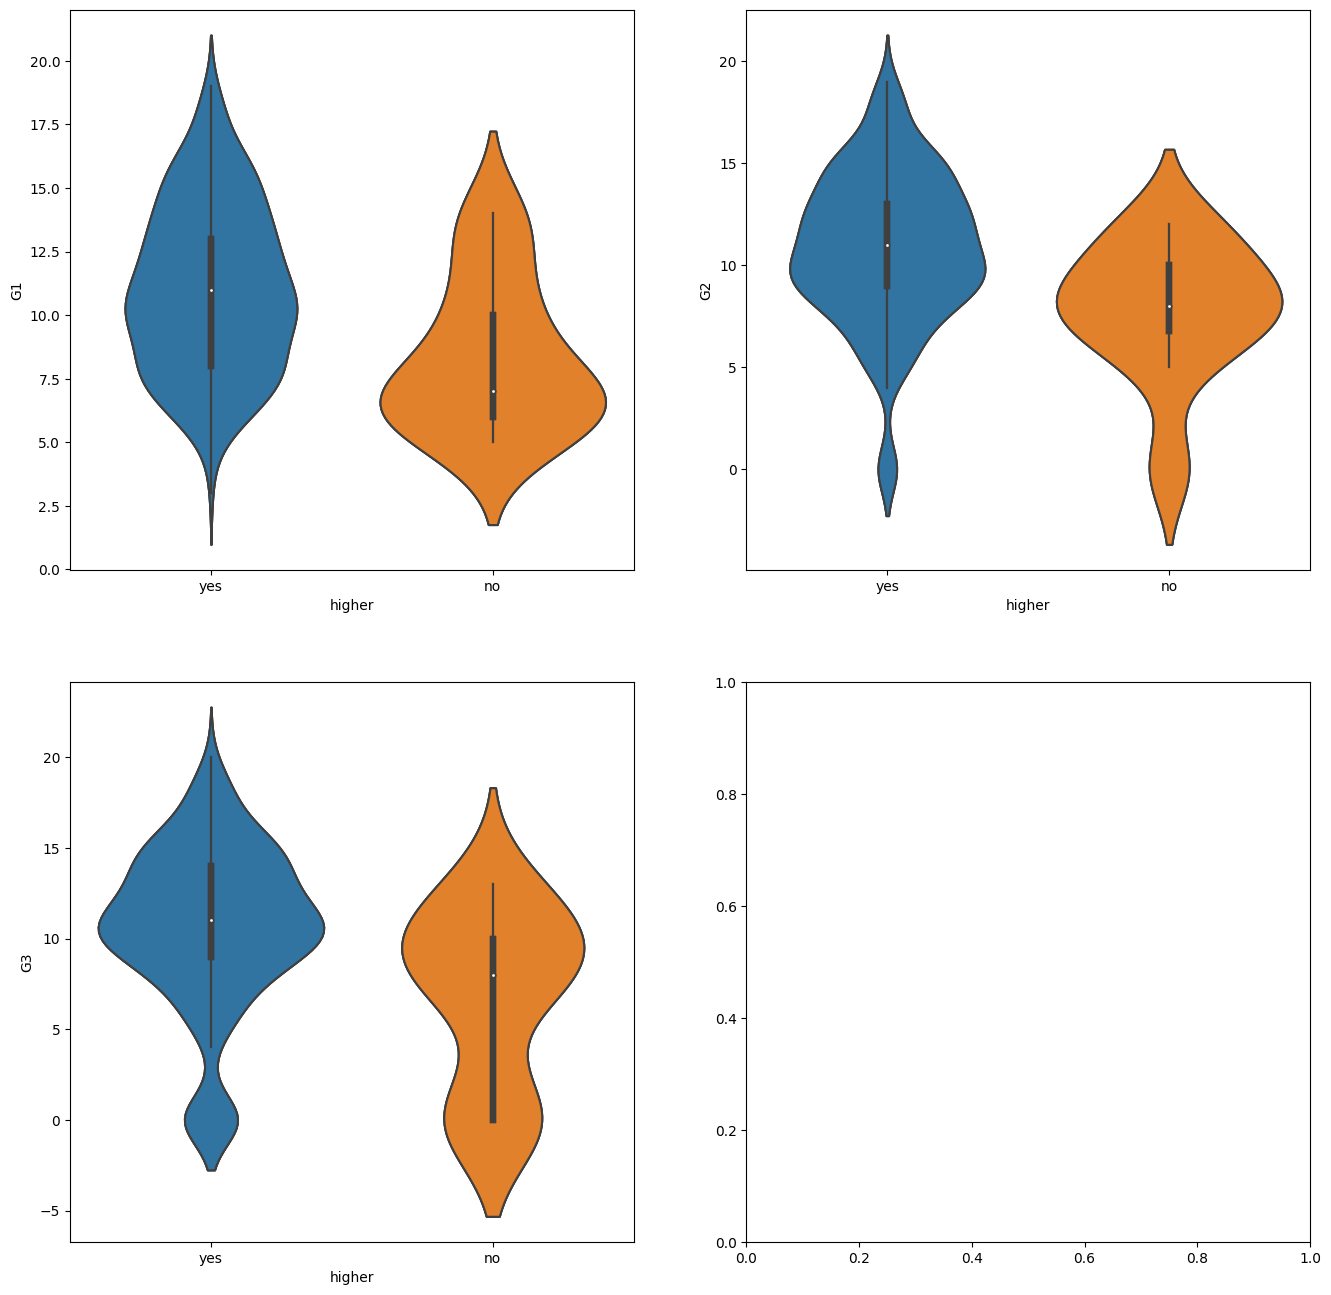

In [56]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16)) 
sns.violinplot(ax=ax[0,0], x=high_scores['higher'], y=high_scores['G1'])
sns.violinplot(ax=ax[0,1], x=high_scores['higher'], y=high_scores['G2'])
sns.violinplot(ax=ax[1,0], x=high_scores['higher'], y=high_scores['G3'])

In [57]:
high_G1 = high_scores[high_scores['higher']=='yes']['G1']
no_high_G1 = high_scores[high_scores['higher']=='no']['G1']
high_G2 = high_scores[high_scores['higher']=='yes']['G2']
no_high_G2 = high_scores[high_scores['higher']=='no']['G2']
high_G3 = high_scores[high_scores['higher']=='yes']['G3']
no_high_G3 = high_scores[high_scores['higher']=='no']['G3']

In [58]:
stat, pval = mannwhitneyu(high_G1, no_high_G1)
print(pval)

0.00032544329512750546


In [59]:
stat, pval = mannwhitneyu(high_G2, no_high_G2)
print(pval)

0.0002719117236833254


In [60]:
stat, pval = mannwhitneyu(high_G3, no_high_G3)
print(pval)

0.0006230234887061189


- Students who want to take higher education have significantly higher scores than those who don't. 

### 9. Internet access with study time and scores.

In [62]:
net_study_scores = df[['internet', 'studytime', 'G1', 'G2', 'G3']] 

In [63]:
net_study_scores 

,internet,studytime,G1,G2,G3
0,no,2,5,6,6
1,yes,2,5,5,6
2,yes,2,7,8,10
3,yes,3,15,14,15
4,no,2,6,10,10
...,...,...,...,...,...
390,no,2,9,9,9
391,yes,1,14,16,16
392,no,1,10,8,7
393,yes,1,11,12,10


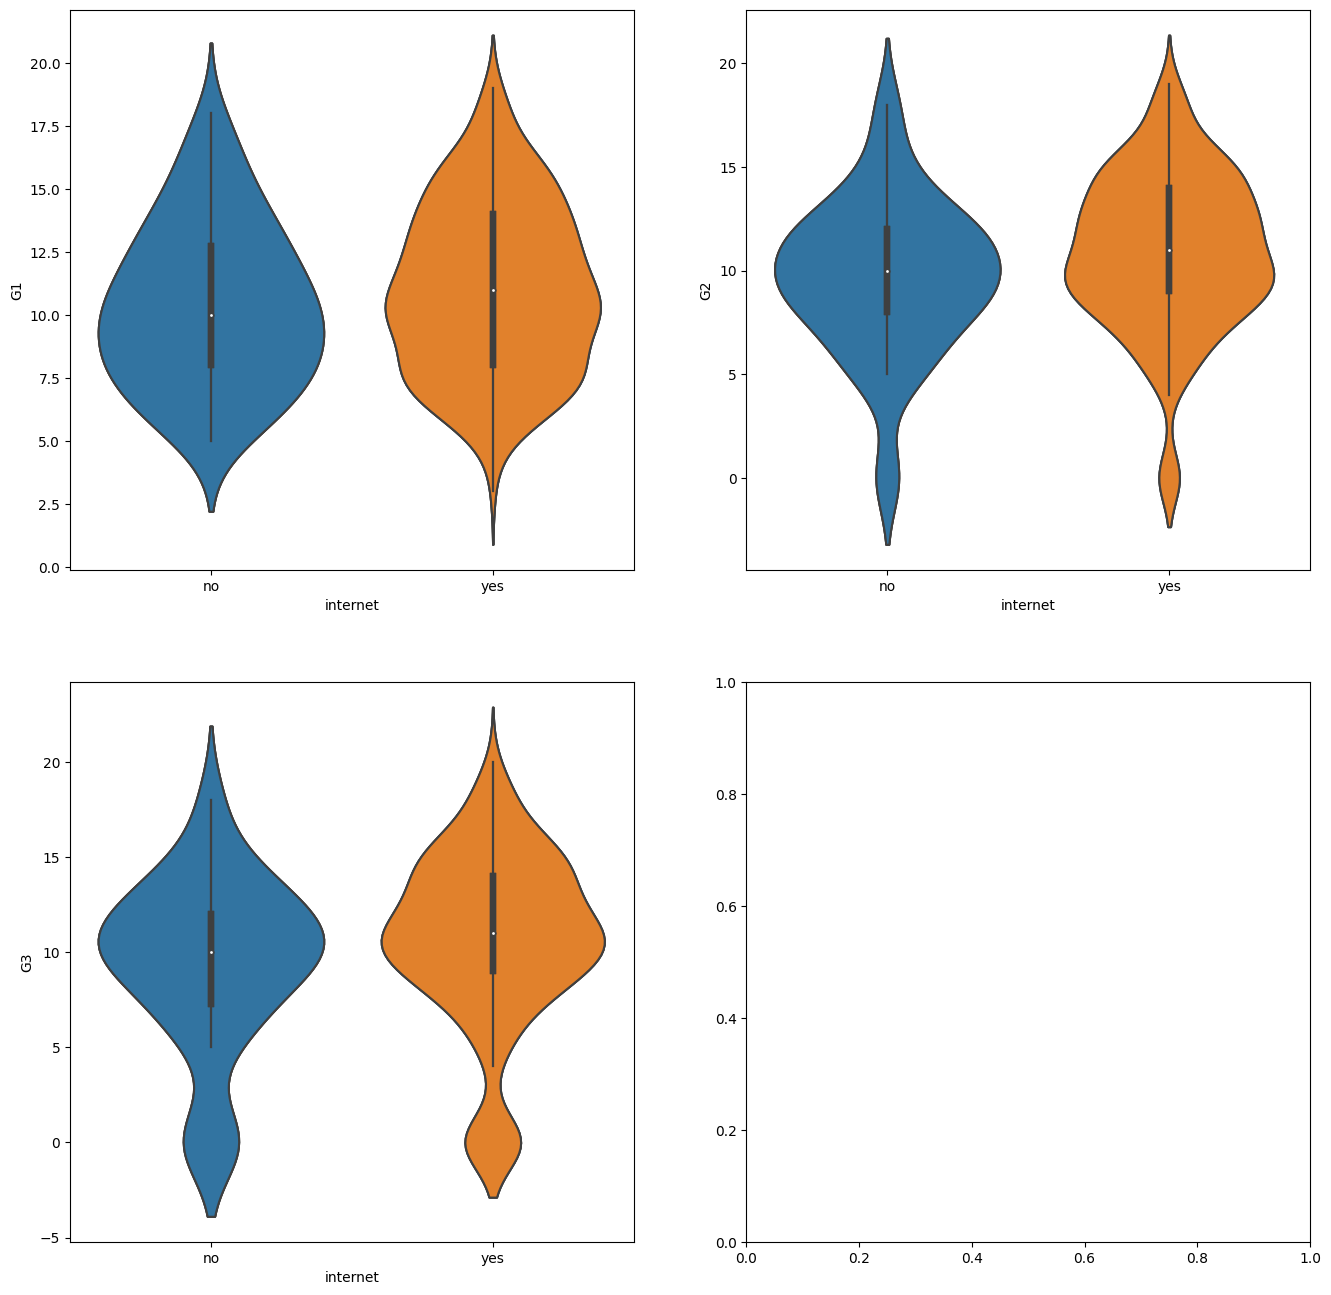

In [64]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16)) 
sns.violinplot(ax=ax[0,0], x=net_study_scores['internet'], y=net_study_scores['G1'])
sns.violinplot(ax=ax[0,1], x=net_study_scores['internet'], y=net_study_scores['G2'])
sns.violinplot(ax=ax[1,0], x=net_study_scores['internet'], y=net_study_scores['G3'])

In [65]:
net_G1 = net_study_scores[net_study_scores['internet']=='yes']['G1']
no_net_G1 = net_study_scores[net_study_scores['internet']=='no']['G1']
net_G2 = net_study_scores[net_study_scores['internet']=='yes']['G2']
no_net_G2 = net_study_scores[net_study_scores['internet']=='no']['G2']
net_G3 = net_study_scores[net_study_scores['internet']=='yes']['G3']
no_net_G3 = net_study_scores[net_study_scores['internet']=='no']['G3']

In [66]:
stat, pval = mannwhitneyu(net_G1, no_net_G1)
print(pval)

0.15278786279494086


In [67]:
stat, pval = mannwhitneyu(net_G2, no_net_G2)
print(pval)

0.013201853948618196


In [68]:
stat, pval = mannwhitneyu(net_G3, no_net_G3)
print(pval)

0.03239630657913107


For alpha=0.05: 
- There is no significant difference in G1 scores between having internet access or not. 
- There is significant difference in G2 and G3 scores between having internet access or not. 
- Having internet access at home might help students in studying since the G2 and G3 scores are higher than those who don't. 

<AxesSubplot:xlabel='internet', ylabel='studytime'>

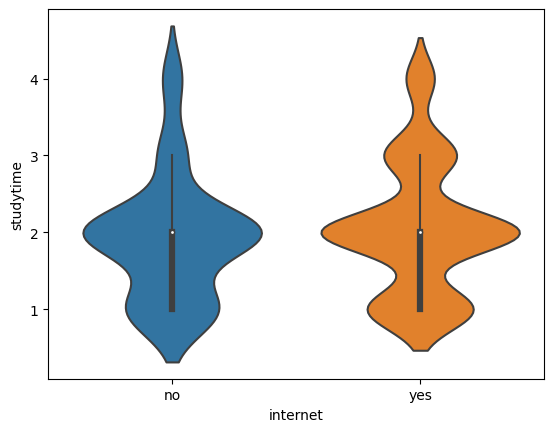

In [71]:
sns.violinplot(x=net_study_scores['internet'], y=net_study_scores['studytime'])

In [69]:
net_study = net_study_scores[net_study_scores['internet']=='yes']['studytime']
no_net_study = net_study_scores[net_study_scores['internet']=='no']['studytime']

In [70]:
stat, pval = mannwhitneyu(net_study, no_net_study)
print(pval)

0.22363586236361432


For alpha=0.05, there is not much different in study time between students who have internet access at their home or not. Most of them study 2-5 hours a week. 

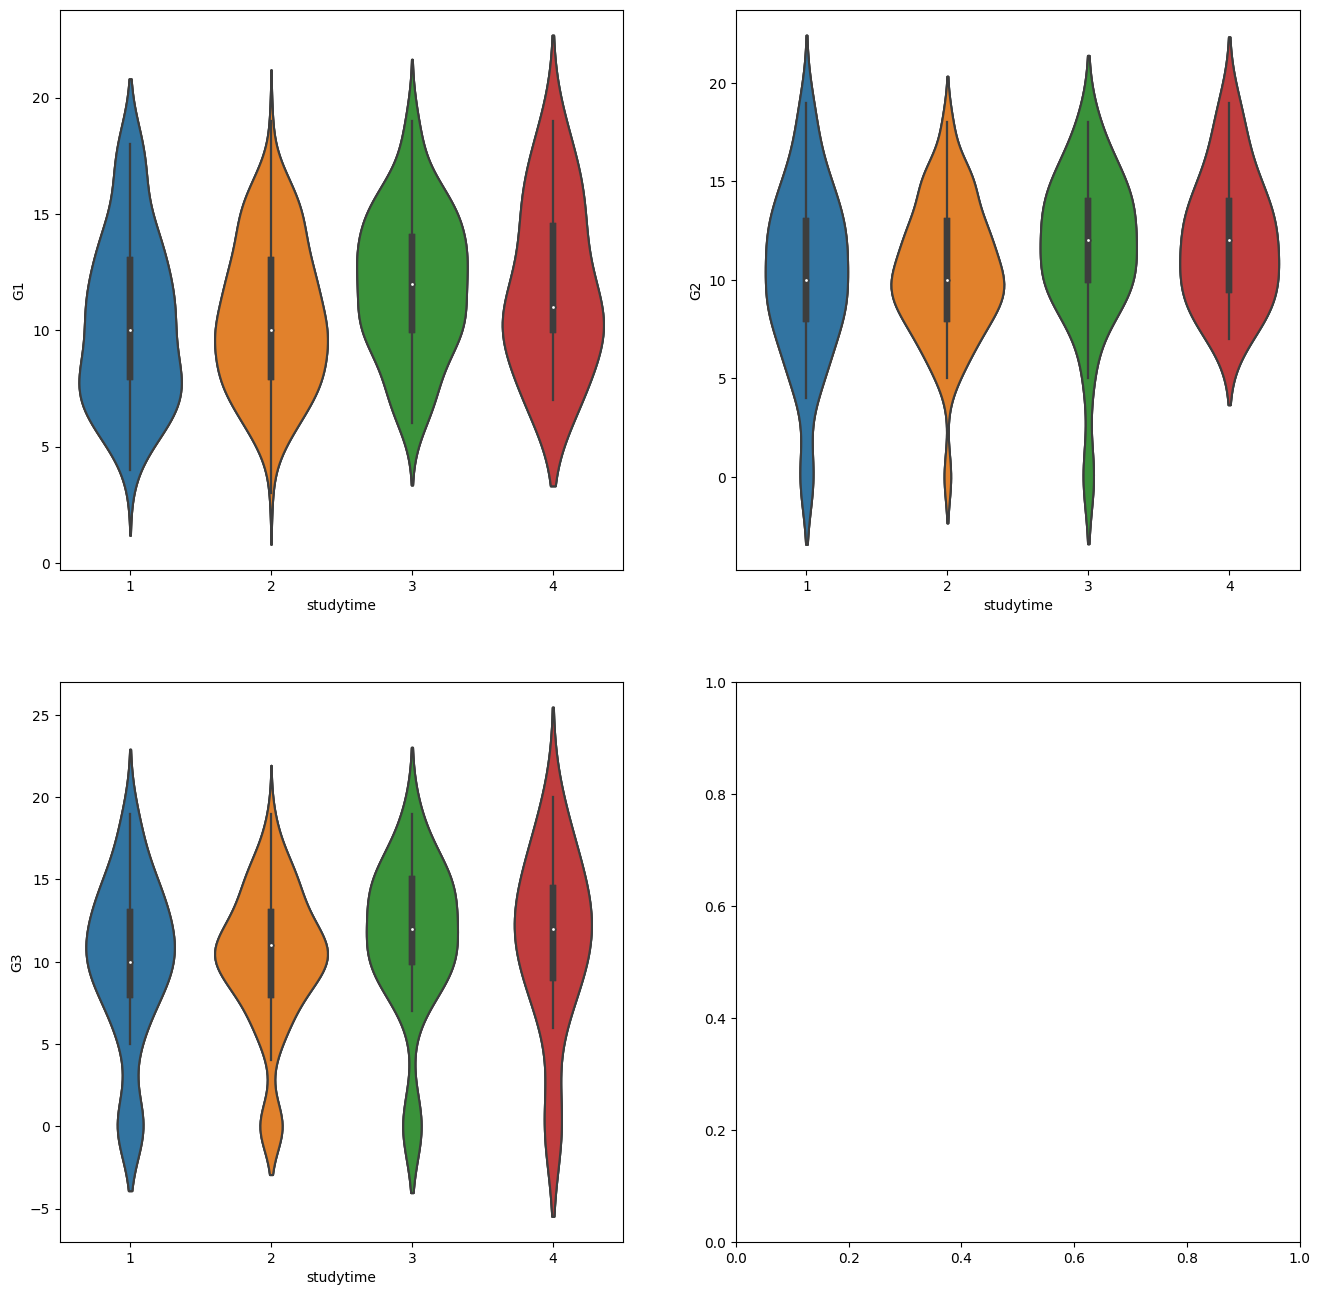

In [72]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16)) 
sns.violinplot(ax=ax[0,0], x=net_study_scores['studytime'], y=net_study_scores['G1'])
sns.violinplot(ax=ax[0,1], x=net_study_scores['studytime'], y=net_study_scores['G2'])
sns.violinplot(ax=ax[1,0], x=net_study_scores['studytime'], y=net_study_scores['G3'])

In [74]:
study1_G1 = net_study_scores[net_study_scores['studytime']==1]['G1']
study2_G1 = net_study_scores[net_study_scores['studytime']==2]['G1']
study3_G1 = net_study_scores[net_study_scores['studytime']==3]['G1']
study4_G1 = net_study_scores[net_study_scores['studytime']==4]['G1']

stat, pval = kruskal(study1_G1, study2_G1, study3_G1, study4_G1)
print(pval)

0.0041179403802807865


In [75]:
study1_G2 = net_study_scores[net_study_scores['studytime']==1]['G2']
study2_G2 = net_study_scores[net_study_scores['studytime']==2]['G2']
study3_G2 = net_study_scores[net_study_scores['studytime']==3]['G2']
study4_G2 = net_study_scores[net_study_scores['studytime']==4]['G2']

stat, pval = kruskal(study1_G2, study2_G2, study3_G2, study4_G2)
print(pval)

0.021772205316072952


In [76]:
study1_G3 = net_study_scores[net_study_scores['studytime']==1]['G3']
study2_G3 = net_study_scores[net_study_scores['studytime']==2]['G3']
study3_G3 = net_study_scores[net_study_scores['studytime']==3]['G3']
study4_G3 = net_study_scores[net_study_scores['studytime']==4]['G3']

stat, pval = kruskal(study1_G3, study2_G3, study3_G3, study4_G3)
print(pval)

0.055566544434365706


For alpha=0.05: 
- There is not significant difference in G1 and G2 scores between study time. 
- There is a significant difference in G3 scores between study time. 

### 10. Romantic relationship with scores. 

In [77]:
roman_scores = df[['sex', 'romantic', 'G1', 'G2', 'G3']]

In [78]:
roman_scores 

,sex,romantic,G1,G2,G3
0,F,no,5,6,6
1,F,no,5,5,6
2,F,no,7,8,10
3,F,yes,15,14,15
4,F,no,6,10,10
...,...,...,...,...,...
390,M,no,9,9,9
391,M,no,14,16,16
392,M,no,10,8,7
393,M,no,11,12,10


In [81]:
roman_sex = roman_scores.groupby(['romantic', 'sex']).size() 

In [82]:
roman_sex 

romantic  sex
no        F      129
          M      134
yes       F       79
          M       53
dtype: int64

In [91]:
roman_sex.unstack()

sex,F,M
romantic,,
no,129,134
yes,79,53


In [93]:
for roman, sex in roman_sex.index: 
    sum = roman_sex[roman, sex] 
    roman_sum = roman_sex[roman].sum() 
    if roman=='no': 
        if sex=='F': 
            print(f"{sum} {round(100*sum/roman_sum, 2)}% students who are not in romantic relationship are female students.") 
        else: 
            print(f"{sum} {round(100*sum/roman_sum, 2)}% students who are not in romantic relationship are male students.") 
    else: 
        if sex=='F': 
            print(f"{sum} {round(100*sum/roman_sum, 2)}% students who are in romantic relationship are female students.") 
        else: 
            print(f"{sum} {round(100*sum/roman_sum, 2)}% students who are in romantic relationship are male students.")

129 49.05% students who are not in romantic relationship are female students.
134 50.95% students who are not in romantic relationship are male students.
79 59.85% students who are in romantic relationship are female students.
53 40.15% students who are in romantic relationship are male students.


<AxesSubplot:xlabel='romantic', ylabel='Count'>

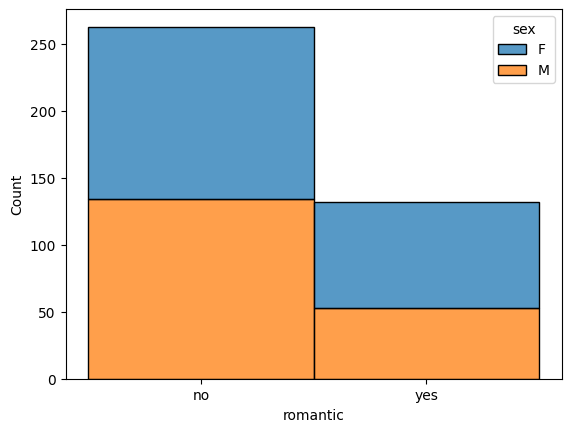

In [80]:
sns.histplot(x=roman_scores['romantic'], hue=roman_scores['sex'],multiple='stack')

In [102]:
in_roman = roman_sex['yes'].sum() 
not_in_roman = roman_sex['no'].sum() 
print(f"{in_roman} ({round(100*in_roman/df.shape[0], 2)}%) out of {df.shape[0]} are in romantic relationship.")
print(f"{not_in_roman} ({round(100*not_in_roman/df.shape[0], 2)}%) out of {df.shape[0]} are not in romantic relationship.")

132 (33.42%) out of 395 are in romantic relationship.
263 (66.58%) out of 395 are not in romantic relationship.


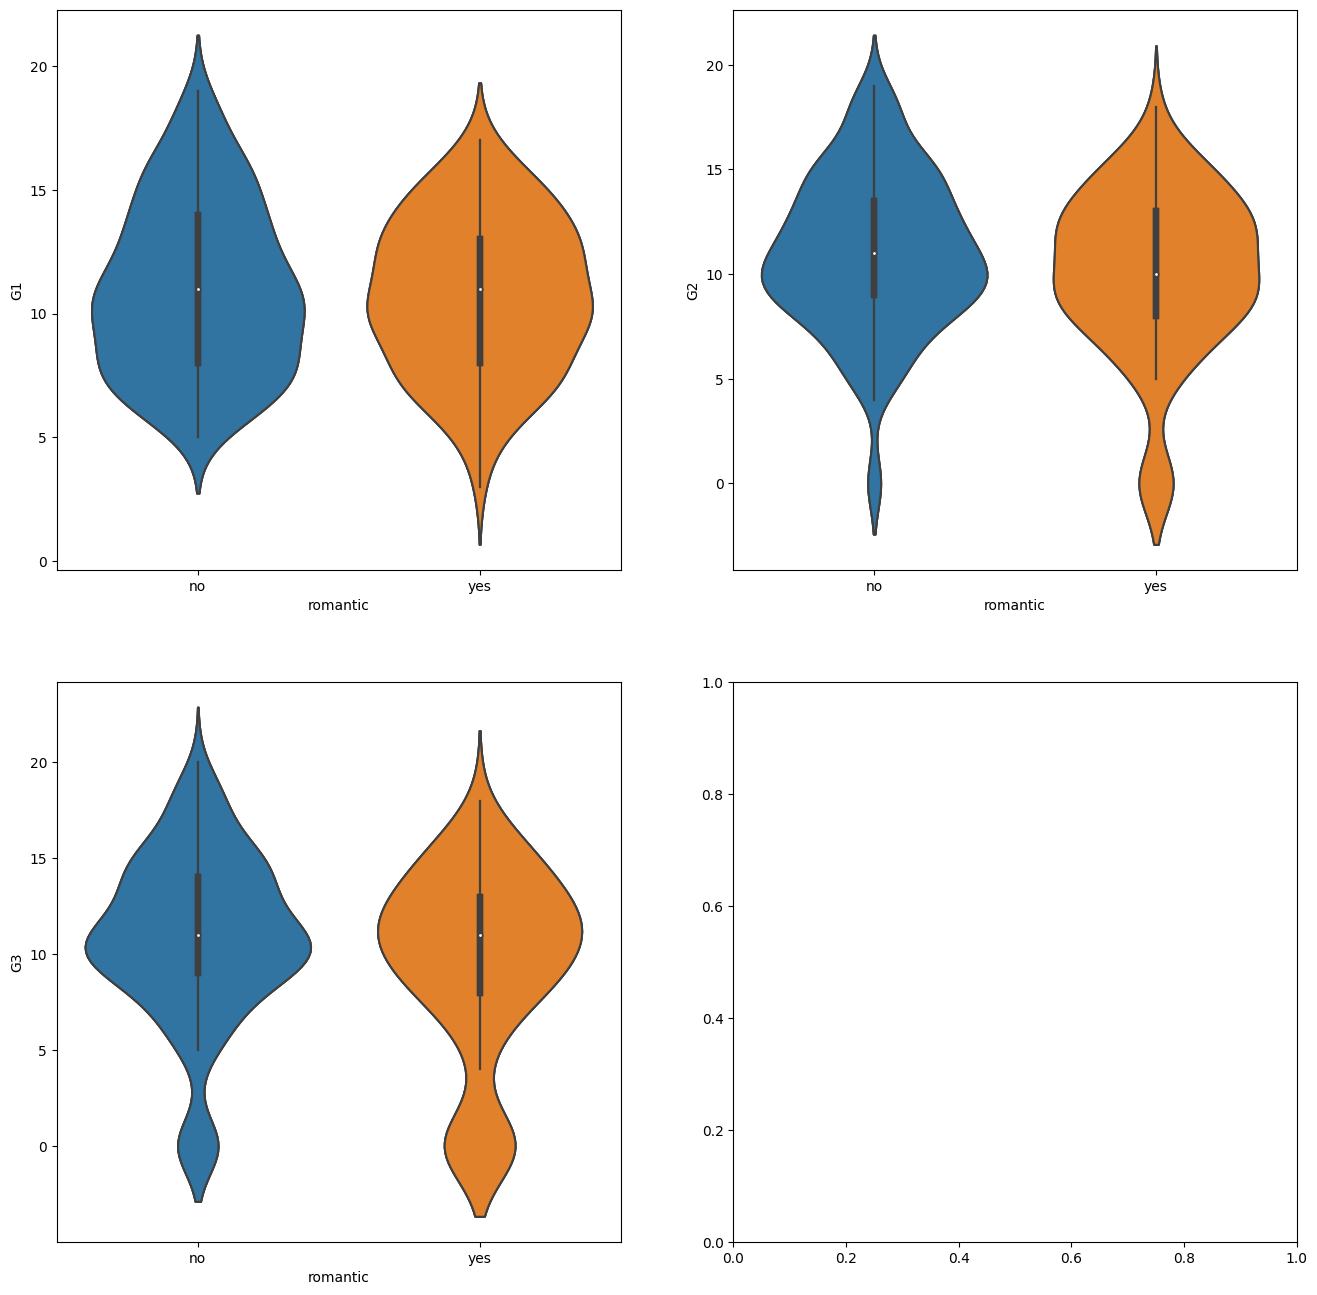

In [103]:
fig, ax = plt.subplots(2, 2, figsize=(16,16)) 
sns.violinplot(ax=ax[0,0], x=roman_scores['romantic'], y=roman_scores['G1'])
sns.violinplot(ax=ax[0,1], x=roman_scores['romantic'], y=roman_scores['G2'])
sns.violinplot(ax=ax[1,0], x=roman_scores['romantic'], y=roman_scores['G3'])

In [104]:
roman_G1 = roman_scores[roman_scores['romantic']=='yes']['G1'] 
no_roman_G1 = roman_scores[roman_scores['romantic']=='no']['G1'] 

stat, pvalue = mannwhitneyu(roman_G1, no_roman_G1) 
print(pvalue)

0.7522801998888806


In [105]:
roman_G2 = roman_scores[roman_scores['romantic']=='yes']['G2'] 
no_roman_G2 = roman_scores[roman_scores['romantic']=='no']['G2'] 

stat, pvalue = mannwhitneyu(roman_G2, no_roman_G2) 
print(pvalue)

0.09341532232312784


In [106]:
roman_G3 = roman_scores[roman_scores['romantic']=='yes']['G3'] 
no_roman_G3 = roman_scores[roman_scores['romantic']=='no']['G3'] 

stat, pvalue = mannwhitneyu(roman_G3, no_roman_G3) 
print(pvalue)

0.06952998588160815


For alpha=0.05, there is not a significant difference in G1, G2, and G3 scores between students who are in romantic relationship or not. 

### 11. Free time and study time. 

In [114]:
free_study = df[['freetime', 'studytime']]

In [115]:
free_study

,freetime,studytime
0,3,2
1,3,2
2,3,2
3,2,3
4,3,2
...,...,...
390,5,2
391,4,1
392,5,1
393,4,1


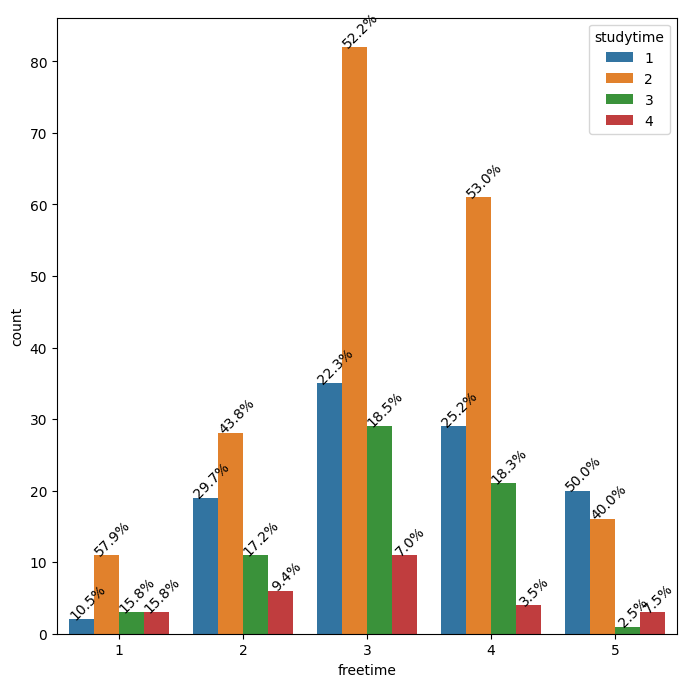

In [176]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 
ax = sns.countplot(x=free_study['freetime'], hue=free_study['studytime']) 

total = [] 
for i in free_study.sort_values('freetime', ascending=True)['freetime'].unique(): 
    total.append(free_study[free_study['freetime']==i].shape[0]) 

for i in range(5): 
    for j in range(4): 
        p = ax.patches[j*5+i] 
        percentage = '{:.1f}%'.format(100 * p.get_height()/total[i]) 
        x = p.get_x() + p.get_width() - 0.05
        y = p.get_height() 
        ax.annotate(percentage, (x, y),ha='center', rotation=45) 


- Most students have medium free time after school, and more than half of those study for 2-5 hours a week. 
- Students who have most free time doesn't study that much, with half study less than 2 hours a week, and 90% of them study less than 5 hours a week. 

### 12. Free time and scores. 

In [177]:
free_scores = df[['freetime', 'G1', 'G2', 'G3']] 

In [178]:
free_scores 

,freetime,G1,G2,G3
0,3,5,6,6
1,3,5,5,6
2,3,7,8,10
3,2,15,14,15
4,3,6,10,10
...,...,...,...,...
390,5,9,9,9
391,4,14,16,16
392,5,10,8,7
393,4,11,12,10


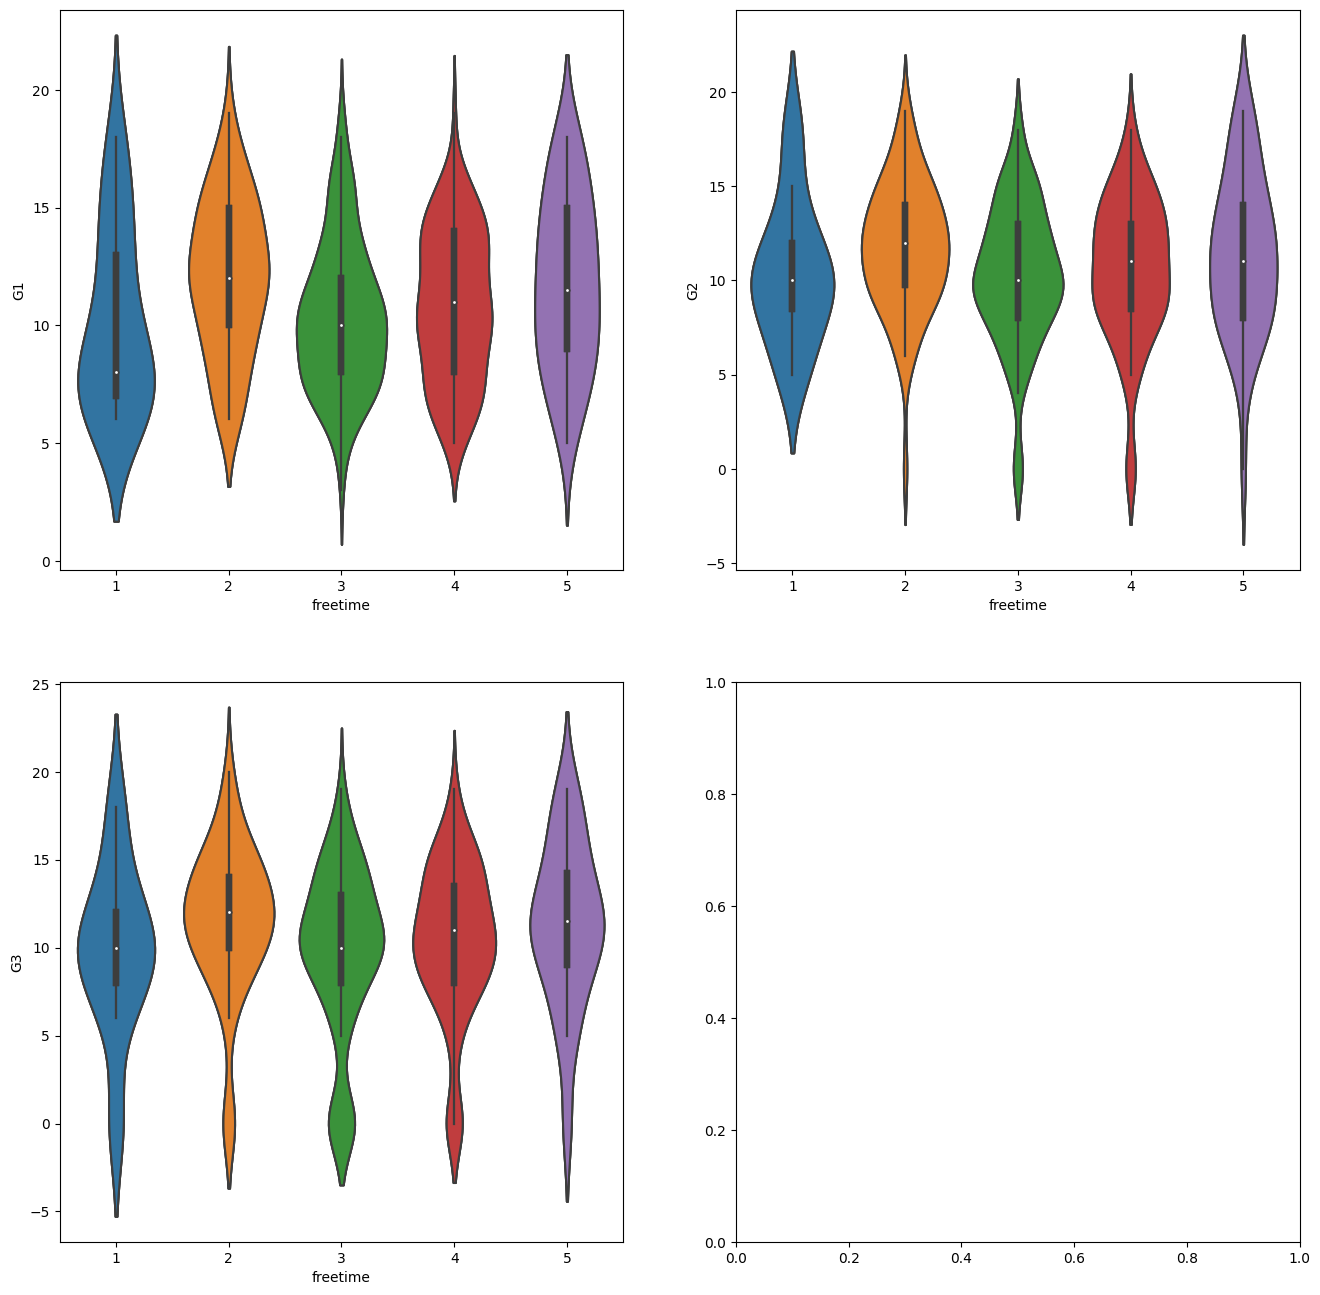

In [179]:
fig, ax = plt.subplots(2, 2, figsize=(16,16)) 
sns.violinplot(ax=ax[0,0], x=free_scores['freetime'], y=free_scores['G1'])
sns.violinplot(ax=ax[0,1], x=free_scores['freetime'], y=free_scores['G2'])
sns.violinplot(ax=ax[1,0], x=free_scores['freetime'], y=free_scores['G3'])

In [183]:
free1_G1 = free_scores[free_scores['freetime']==1]['G1'] 
free2_G1 = free_scores[free_scores['freetime']==2]['G1'] 
free3_G1 = free_scores[free_scores['freetime']==3]['G1'] 
free4_G1 = free_scores[free_scores['freetime']==4]['G1'] 
free5_G1 = free_scores[free_scores['freetime']==5]['G1'] 

stat, pvalue = kruskal(free1_G1, free2_G1, free3_G1, free4_G1, free5_G1) 
print(pvalue) 

0.0037424232675695424


In [184]:
free1_G2 = free_scores[free_scores['freetime']==1]['G2'] 
free2_G2 = free_scores[free_scores['freetime']==2]['G2'] 
free3_G2 = free_scores[free_scores['freetime']==3]['G2'] 
free4_G2 = free_scores[free_scores['freetime']==4]['G2'] 
free5_G2 = free_scores[free_scores['freetime']==5]['G2'] 

stat, pvalue = kruskal(free1_G2, free2_G2, free3_G2, free4_G2, free5_G2) 
print(pvalue) 

0.08436594745983336


In [185]:
free1_G3 = free_scores[free_scores['freetime']==1]['G3'] 
free2_G3 = free_scores[free_scores['freetime']==2]['G3'] 
free3_G3 = free_scores[free_scores['freetime']==3]['G3'] 
free4_G3 = free_scores[free_scores['freetime']==4]['G3'] 
free5_G3 = free_scores[free_scores['freetime']==5]['G3'] 

stat, pvalue = kruskal(free1_G3, free2_G3, free3_G3, free4_G3, free5_G3) 
print(pvalue) 

0.05908052586728495


For alpha=0.05: 
- There is a significant difference in G1 scores between levels of freetime. Those who have least free time tend to score lower than others. 
- There is not a significant difference in G2 and G3 scores between levels of freetime. 

### 13. Study time and scores. 

In [180]:
study_scores = df[['studytime', 'G1', 'G2', 'G3']] 

In [181]:
study_scores 

,studytime,G1,G2,G3
0,2,5,6,6
1,2,5,5,6
2,2,7,8,10
3,3,15,14,15
4,2,6,10,10
...,...,...,...,...
390,2,9,9,9
391,1,14,16,16
392,1,10,8,7
393,1,11,12,10


<AxesSubplot:xlabel='studytime', ylabel='G3'>

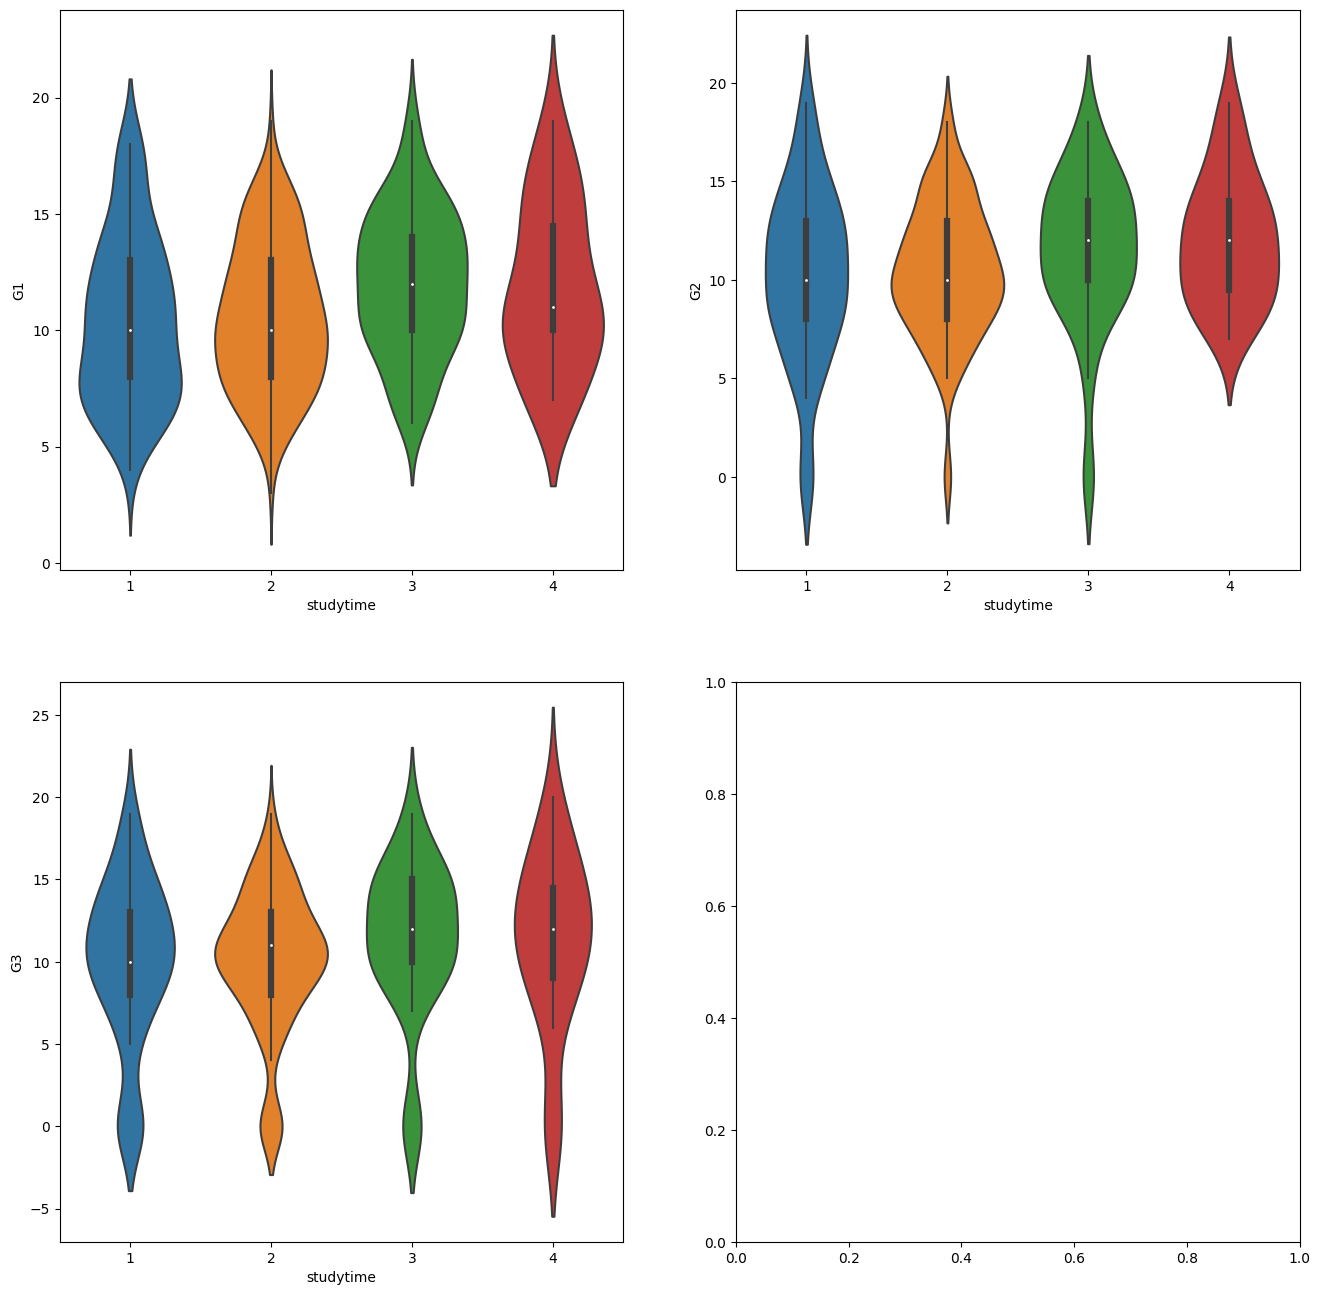

In [204]:
fig, ax = plt.subplots(2, 2, figsize=(16,16)) 
sns.violinplot(ax=ax[0,0], x=study_scores['studytime'], y=study_scores['G1'])
sns.violinplot(ax=ax[0,1], x=study_scores['studytime'], y=study_scores['G2'])
sns.violinplot(ax=ax[1,0], x=study_scores['studytime'], y=study_scores['G3'])

In [190]:
study1_G1 = study_scores[study_scores['studytime']==1]['G1'] 
study2_G1 = study_scores[study_scores['studytime']==2]['G1'] 
study3_G1 = study_scores[study_scores['studytime']==3]['G1'] 
study4_G1 = study_scores[study_scores['studytime']==4]['G1'] 

stat, pvalue = kruskal(study1_G1, study2_G1, study3_G1, study4_G1) 
print(pvalue) 

0.0041179403802807865


In [191]:
study1_G2 = study_scores[study_scores['studytime']==1]['G2'] 
study2_G2 = study_scores[study_scores['studytime']==2]['G2'] 
study3_G2 = study_scores[study_scores['studytime']==3]['G2'] 
study4_G2 = study_scores[study_scores['studytime']==4]['G2'] 

stat, pvalue = kruskal(study1_G2, study2_G2, study3_G2, study4_G2) 
print(pvalue) 

0.021772205316072952


In [192]:
study1_G3 = study_scores[study_scores['studytime']==1]['G3'] 
study2_G3 = study_scores[study_scores['studytime']==2]['G3'] 
study3_G3 = study_scores[study_scores['studytime']==3]['G3'] 
study4_G3 = study_scores[study_scores['studytime']==4]['G3'] 

stat, pvalue = kruskal(study1_G3, study2_G3, study3_G3, study4_G3) 
print(pvalue) 

0.055566544434365706


For alpha=0.05: 
- There is a significant difference in G1 and G2 scores between levels of students' study time. 
- There is not a significant difference in G3 scores between levels of students' study time. 

## Conclusion 
- There are more students in GP school than MS school. 
- Almost half of MS school chose MS school because of the course. 
- Male and female students are quite similar in count, but male students' scores are slightly above female students' scores. 
- There are a few students in rural area. Students who live in urban area are much closer to both schools. 
- A few students don't live with their parent/family, while most students live with their parents. 
- Both schools don't give much support. 
- Most parents are educated with mothers mostly have higher education. On contrast, fathers mostly in 5th to 9th grade. 
- Students whose parents have no education tend to score higher, almost the same as students whose parents in secondary education. 
- Students' scores increases from parents with primary education to parents with higher education. 
- Most students don't have extra educational support. 
- Most students have educational support from family, but there is not much different than those who don't. 
- There is no significant change in scores by paying for extra class. 
- Students with and without extra-curricular activities are pretty even. The difference in their scores are not significant. 
- Having internet may help students achieving sligthly higher scores in G2 and G3 than those who don't. 
- Most students study for less than 5 hours regardless the free time they have after school. 
- Students who have free time less than 2 hours tend to score lower than others in G1 score. 
- Students who study longer than others tend to have scores higher than students who don't in G1 and G2 scores. 